In [2]:
from vpny_qmlt.trader.base import BacktestingMode
import warnings
import rank_strategy as strategy
from importlib import reload
from vpny_qmlt.gateway.backtesting import engine
from vpny_qmlt.trader.optimize import OptimizationSetting
from vpny_qmlt.trader.setting import SETTINGS
from vpny_qmlt.trader.constant import Interval

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
SETTINGS["log.level"] = logging.INFO

warnings.filterwarnings('ignore')

engine = engine.BacktestingEngine()

#                     )
engine.set_parameters(
    interval=Interval.MINUTE,  # 周期，分为tick，分钟，小时
    start=20190101,
    # end=20210712,  # start,end是根据tranding_day来的, 输入int如20210511
    slippage_tick=0,
    capital=20000000,
    vt_symbols=["rb99.SHFE"],  # ["rb99.SHFE", ],
    rates=[1 / 10000],
    source_dir="Y:\\DataBase_RQ_files\\",  # "Y:\\DataBase_RQ_files\\",
    margin_rates=[0.13]
)
engine.add_strategy(strategy.Test01, "test", ['rb99.SHFE'], {
    'shift_rtn': 140,
    "test": {'sample_size': 30000,
             "bins" :30},
})


2023-04-14 18:41:39.988011	开始加载历史数据
2023-04-14 18:41:43.024168	回测开始,Bar数量=34.8万行
2019-01-02 09:01:00.000001	指标初始
2019-01-02 09:01:00.000002	信号初始化
2019-01-02 09:01:00.000005	策略初始
2019-01-02 09:01:00.000006	策略初始化
2019-01-02 09:01:00.000007	策略启动
2019-01-02 09:01:00.000008	策略启动
Loading 100%[****************************************************************************************************->]424.30s
2023-04-14 14:59:00.000001	策略停止
2023-04-14 14:59:00.000002	策略释放
2023-04-14 14:59:00.000003	指标释放
回测结果不满足置信水平。交易笔数：实际(11807) > 胜率要求最小值(742.8); 交易天数：实际(1040) < 夏普要求最小值(135317.1)


,Values,Indicators_2,Values_2
Indicators,,,
第一笔交易时间,2019-01-04 22:04:00,最后一笔交易时间,2023-04-14 14:59:00
总交易天数,1040,总交易笔数,11807
起始资金,"20,000,000",期末资金,"20,072,450"
最大占用资金,"2,723,953",最大占用资金说明,最大持仓市值的30% + 最大回撤资金
日均交易笔数,11.35,交易笔数说明,"一开一平算一笔,不论手数"
-------------,-------------,-------------,-------------
年化收益率,0.62 %,年化收益说明,不考虑复利:总收益率*250/总交易天数
夏普率（日）,0.0,夏普率（年）,0.07
波动率（年）,8.925,收益回撤比,0.1


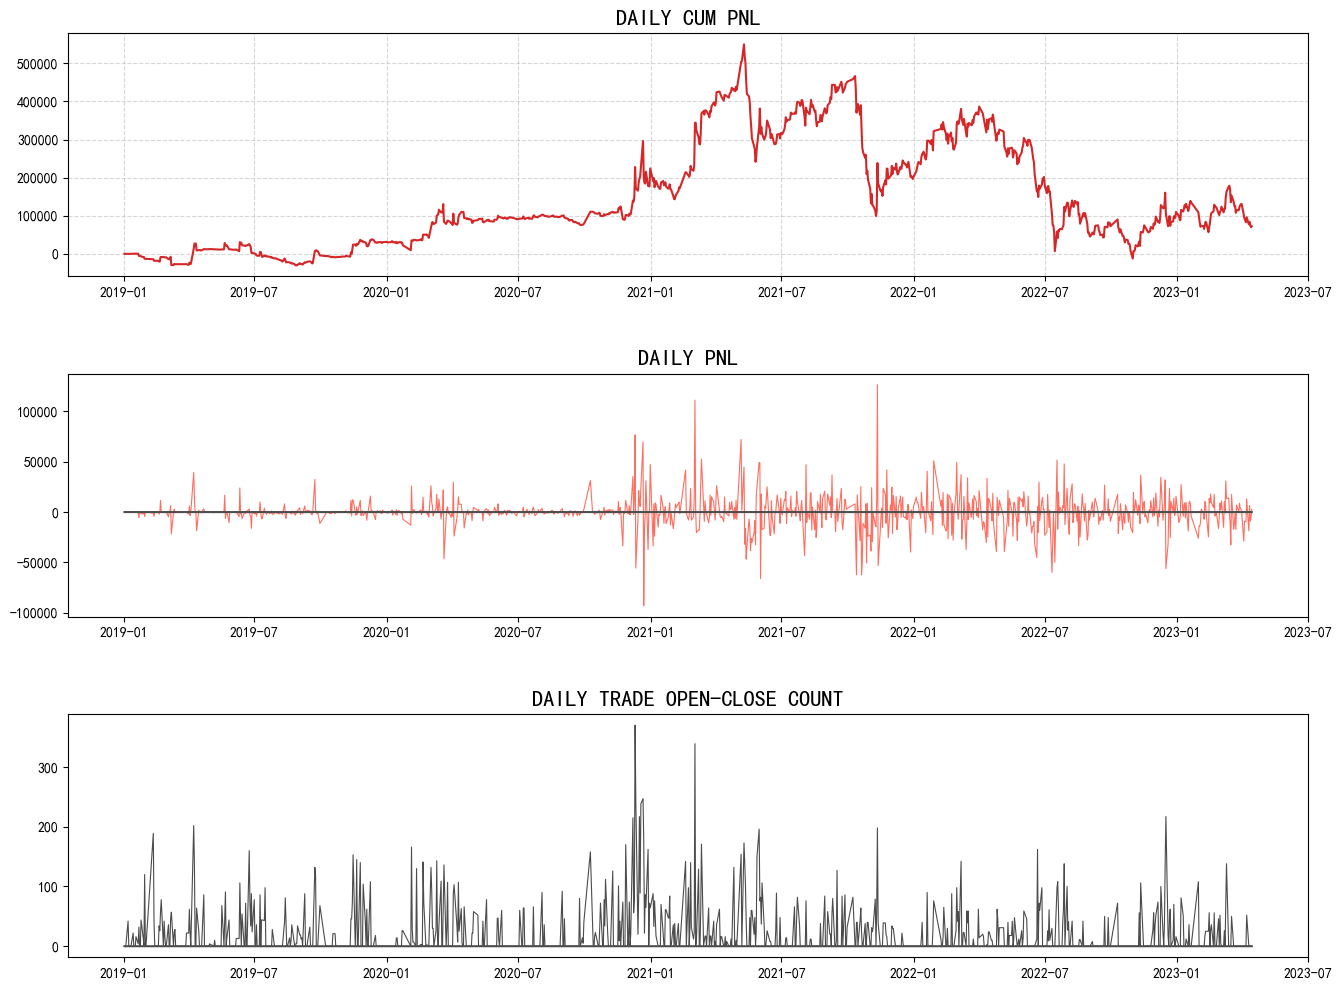

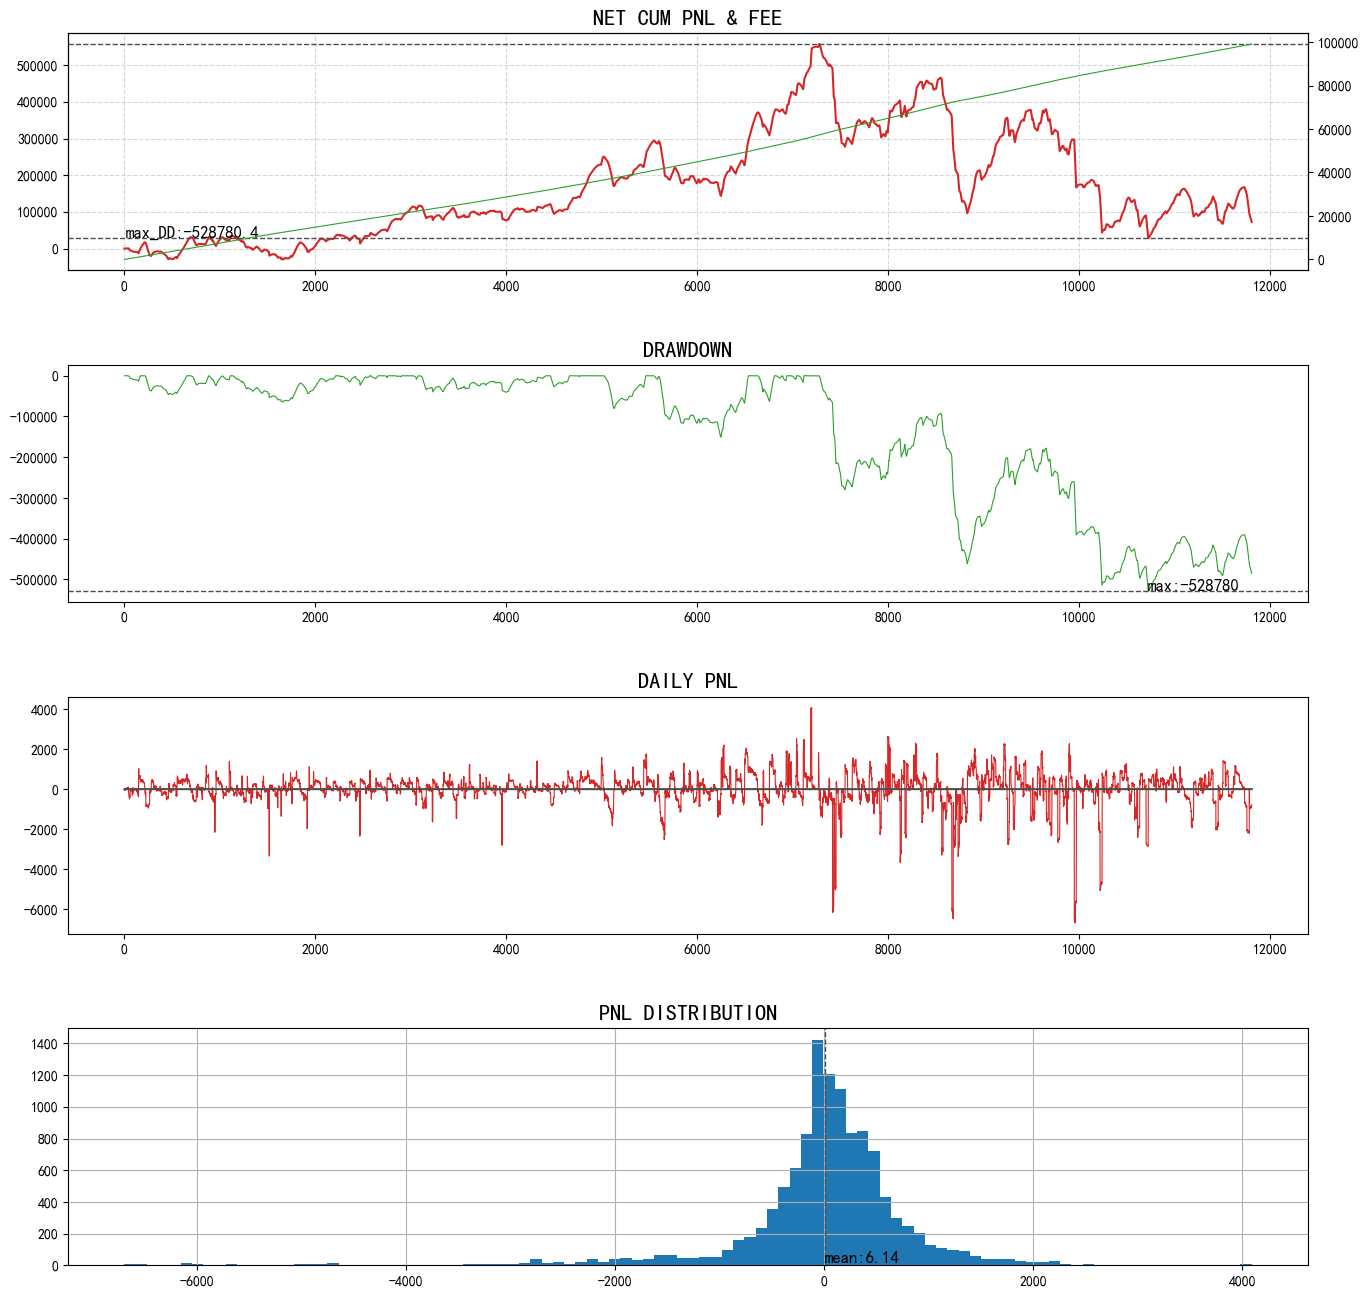

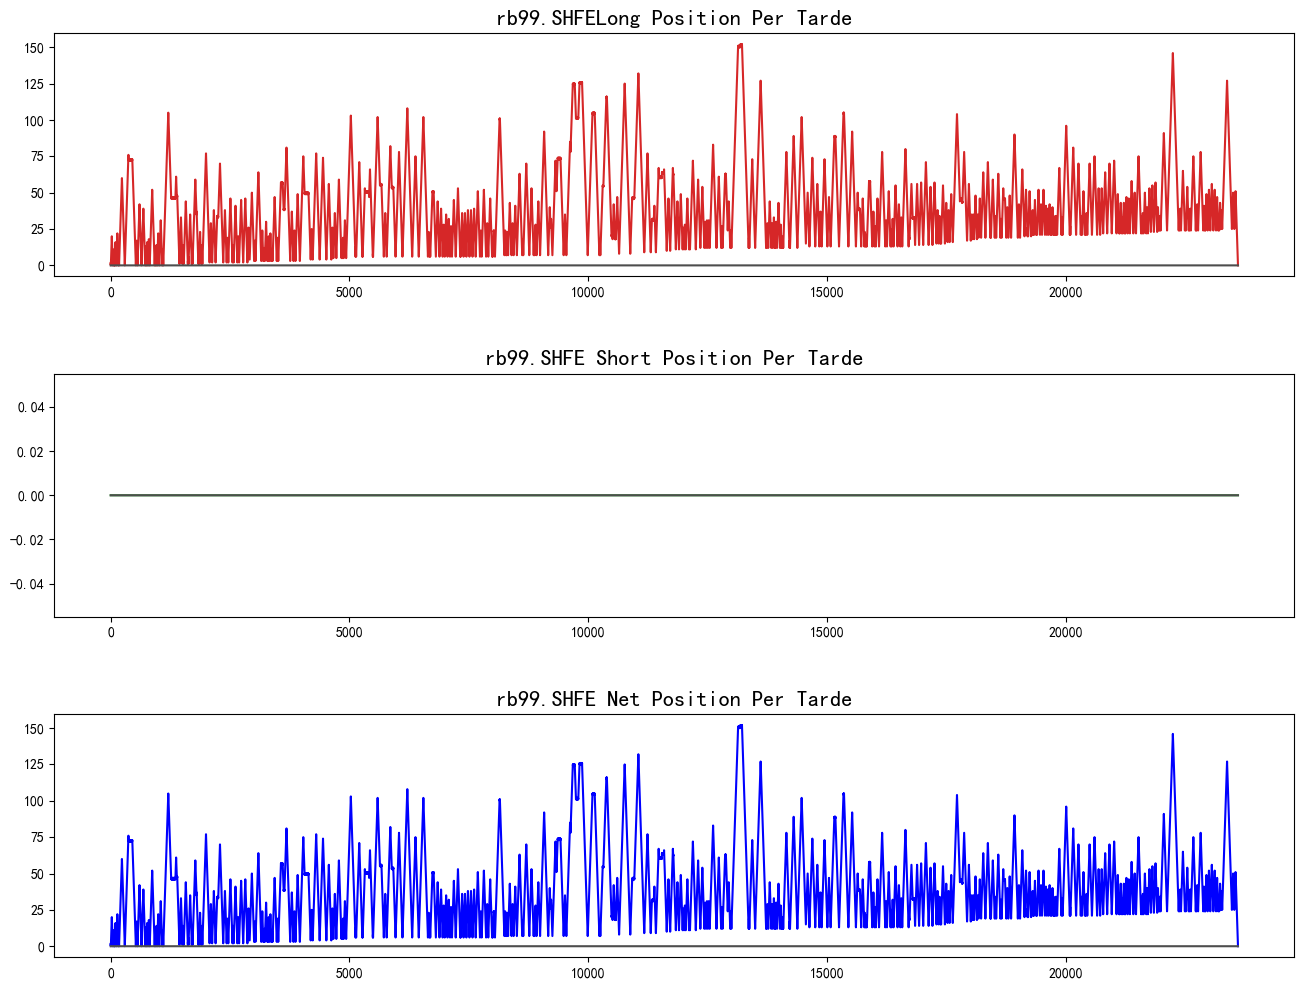

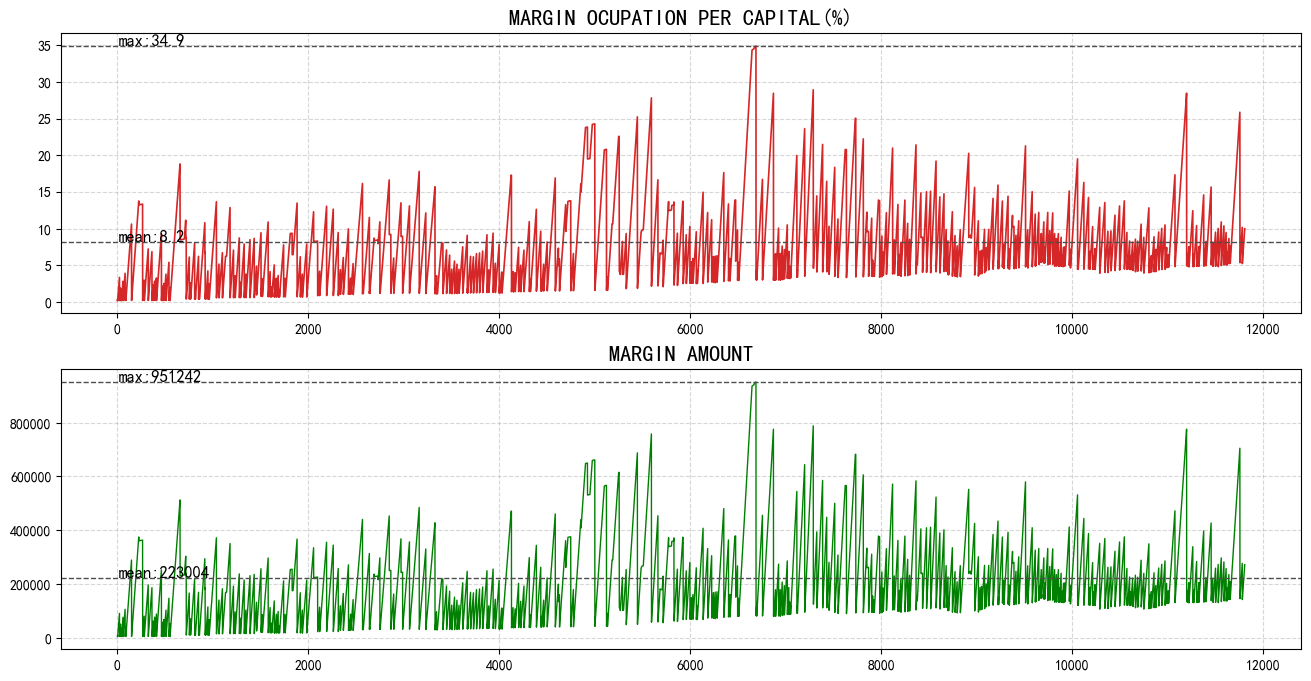

In [3]:
engine.run()
engine.show_backtesting_result(save=True)
# engine.get_show_engine().show_sub_daily_result("rb99.SHFE")
# engine.get_show_engine().show_sub_daily_result("i99.DCE")
# engine.show_backtesting_plot()




In [7]:
# engine.show_backtesting_result(save=True)               # 把总体回测结果保存到本地
order_details = engine.se.get_order_detail(save=True)   # 获取订单详情保存到本地
pnl_details = engine.se.get_pnl_fifo_detail(save=True)  # 获取逐笔盈亏详情 保存到本地


<AxesSubplot:>

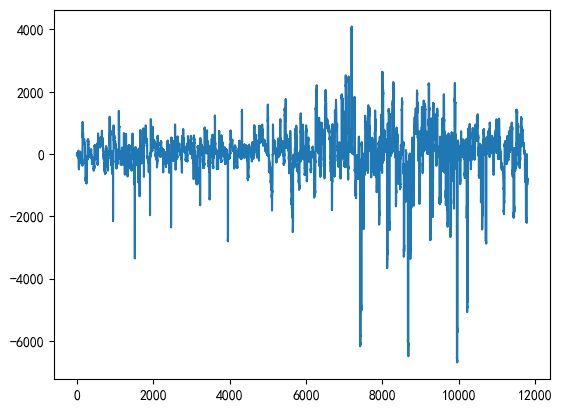

In [11]:
pnl_details = pd.read_csv("pnl_fifo_detail.csv")
pnl_details

In [4]:
a = {1:1,2:2,3:3}
a.pop(1)
a

{2: 2, 3: 3}

In [5]:
d ={"a":1,"b":2,    "c":3}

for k, v in d.items():
    d.pop(k)
d

RuntimeError: dictionary changed size during iteration

In [ ]:
d = {}

for k, v in d.copy().items():
    d.pop(k)



In [ ]:
from vpny_qmlt.trader.optimize import OptimizationSetting
op_settings = {}

op_setting = OptimizationSetting()
sf18_parameter = OptimizationSetting()
liqka_parameter = OptimizationSetting()


op_setting.add_parameter("minbar", 5)

sf18_parameter.add_parameter("p", 6, 10, 1)
sf18_parameter.add_parameter("p_short", 40, 41, 1)
op_setting.add_optimizationsetting("sf18_parameter", sf18_parameter)

liqka_parameter.add_parameter("TRS", 0.03, 0.04, 0.01)
liqka_parameter.add_parameter("delta_t", 0.02)
liqka_parameter.add_parameter("min_thre", 0.3)
op_setting.add_optimizationsetting("liqka", liqka_parameter)

op_settings["sf18"] = op_setting
op_settings["sf18_i99"] = op_setting

a,b =engine.run_optimization(op_settings, target_name="total profit rate", output=True)



In [ ]:
c, d = engine.run_ga_optimization(
    op_settings, target_name="total profit rate", output=True)


In [ ]:
# 把 engine.optimize_result 保存成为pkl文件
import pickle
with open("optimize_result.pkl", "wb") as f:
    pickle.dump(engine.optimize_result, f)
with open ("ga_optimize_result.pkl", "wb") as f:
    pickle.dump(engine.ga_optimize_result, f)
        


In [ ]:

# engine.get_show_engine().calculate_daily_result()


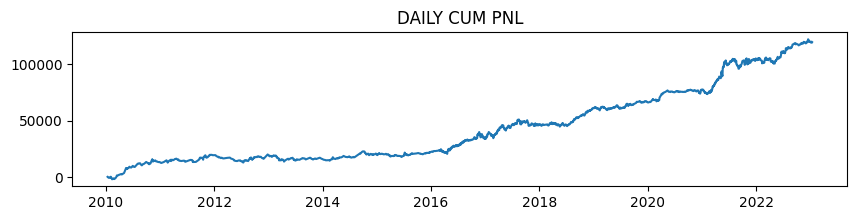
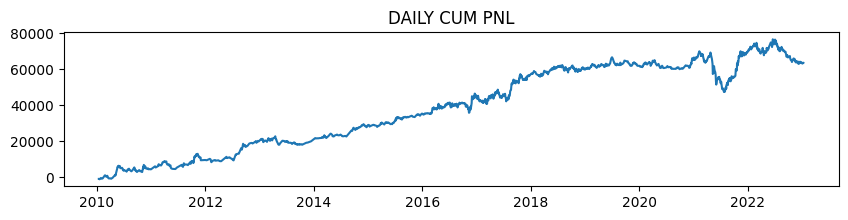

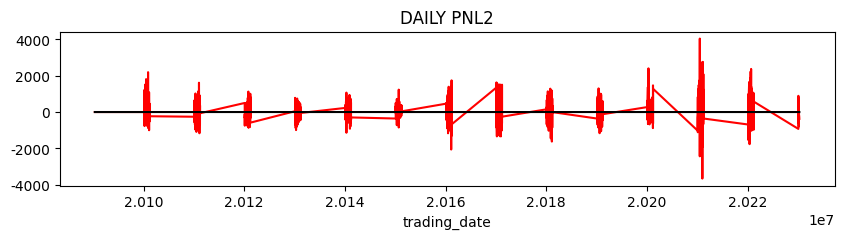